In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [5]:
df= pd.read_csv("./sample_data/california_housing_train.csv")

In [6]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


from matplotlib import pyplot as plt
df['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [10]:
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(167973.4662198586, 0.0)

### В этом тесте Бартлетта значение p равно 0. Тест был статистически значимым, что указывает на то, что наблюдаемая корреляционная матрица не является единичной матрицей.

In [19]:
kmo_all,kmo_model=calculate_kmo(df)

In [16]:
kmo_model

0.6584672486727183

### Не слишком высокое значение, но продолжим дальнейший факторный анализ

In [25]:
fa = FactorAnalyzer()
fa.fit(X)
ev, v = fa.get_eigenvalues()

In [26]:
ev

array([3.91167704, 1.90686351, 1.0725918 , 0.82308894, 0.14375283,
       0.08117511, 0.04660647, 0.01424429])

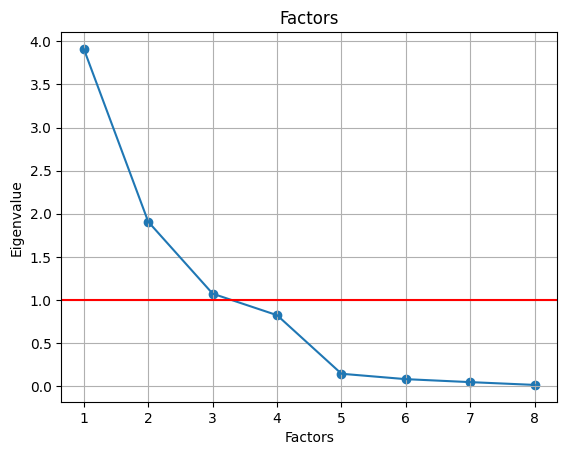

In [31]:
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.axhline(y=1, c='r')
plt.title('Factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Всего 3 значения больше 1, следовательно берем 3 фактора

In [53]:
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')

fa.fit(X)
loadings = np.abs(fa.loadings_).tolist()
for load, feature in zip(loadings, X.columns):
    load.append(feature)

cols = [f'Factor {i + 1}' for i in range(3)]
cols.append('Feature')

load_df = pd.DataFrame(loadings, columns=cols)
load_df

,Factor 1,Factor 2,Factor 3,Feature
0,0.049825,0.997211,0.028314,longitude
1,0.046873,0.925561,0.053581,latitude
2,0.333280,0.051367,0.099230,housing_median_age
3,0.954139,0.004233,0.148040,total_rooms
4,0.980952,0.024415,0.065475,total_bedrooms
5,0.906517,0.065204,0.048918,population
6,0.985846,0.020595,0.049674,households
7,0.052953,0.017626,0.995936,median_income


<Axes: ylabel='Feature'>

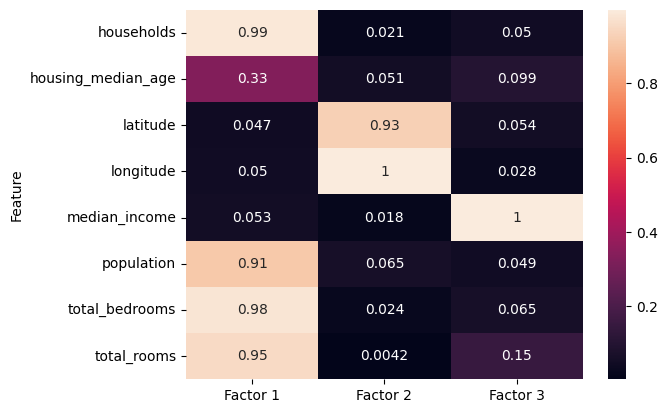

In [54]:
sns.heatmap(load_df.pivot_table(index='Feature'), annot=True)

In [45]:
fv = fa.get_factor_variance()

In [48]:
pd.DataFrame(fv, columns=[f'Factor {i + 1}' for i in range(3)])

,Factor 1,Factor 2,Factor 3
0,3.784872,1.859332,1.036471
1,0.473109,0.232417,0.129559
2,0.473109,0.705526,0.835085


cumulative variance = 83%

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
X_factor = fa.transform(X_train)
X_factor_test = fa.transform(X_test)

In [70]:
model = CatBoostRegressor(
    iterations=1000,
    depth=4,
    learning_rate=0.01,
    loss_function='RMSE',
    verbose=200
)

In [72]:
model.fit(X_factor, y_train)

0:	learn: 115782.5534471	total: 2.61ms	remaining: 2.61s
200:	learn: 81269.9124997	total: 1.29s	remaining: 5.14s
400:	learn: 76469.4249038	total: 2.03s	remaining: 3.04s
600:	learn: 75098.3043328	total: 2.65s	remaining: 1.76s
800:	learn: 74383.8147809	total: 3.52s	remaining: 874ms
999:	learn: 73896.9168612	total: 4.03s	remaining: 0us


In [73]:
predictions = model.predict(X_factor_test)

# Оценка качества модели
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Test RMSE: {rmse:.2f}')

Test RMSE: 74025.00


In [74]:
model.fit(X_train, y_train)

0:	learn: 115735.5223796	total: 3.32ms	remaining: 3.31s
200:	learn: 74737.0128519	total: 928ms	remaining: 3.69s
400:	learn: 65163.7679242	total: 1.7s	remaining: 2.54s
600:	learn: 60251.2517072	total: 2.81s	remaining: 1.86s
800:	learn: 57159.7377062	total: 3.59s	remaining: 892ms
999:	learn: 54971.0468117	total: 4.4s	remaining: 0us


In [75]:
predictions = model.predict(X_test)

# Оценка качества модели
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Test RMSE: {rmse:.2f}')

Test RMSE: 55797.89


### В итоге уменьшение размерности ухудшило конечный результат, что приводит к выводу, что данный метод не подходит для всех данных и следует его использовать аккуратно